In [2]:
import sys
sys.version

%matplotlib inline

In [3]:
!pip3 install fastai==2.0

     |████████████████████████████████| 358kB 14.4MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
#from fastai.vision.all import *
import fastai
print(fastai.__version__) 

2.0.0


In [5]:
!pip3 install nbdev
!pip3 install fastai==2.0.19 fastcore==1.3.2


     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 194kB 14.8MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 748.8MB 22kB/s 
     |████████████████████████████████| 5.9MB 47.1MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
ERROR: nbdev 1.1.14 has requirement fastcore>=1.3.19, but you'll have fastcore 1.3.2 which is incompatible.
ERROR: fastrelease 0.1.11 has requirement fastcore>=1.3.13, but you'll have fastcore 1.3.2 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: fastcore 1.3.20
    Uninstalling fastcore-1.3.20:
      Successfully uninstalled fastcore-1.3.20
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvisio

In [1]:
from fastai.vision.all import *
from nbdev.showdoc import *


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


#FOLDERNAME = 'cs231n/project/UHManoa100/train/Acalypha_hispida'
FOLDERNAME = 'cs231n/project/UHManoa100'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Mounted at /content/drive


In [3]:
bs = 64

In [4]:
p = '/content/drive/MyDrive/{}'.format(FOLDERNAME)
print(p)
from pathlib import Path
str_path = p
path = Path(str_path)
#fnames = get_image_files(p)
#len(fnames)

/content/drive/MyDrive/cs231n/project/UHManoa100


In [5]:
#dls = ImageDataLoaders.from_name_re(
#    path, fnames, pat=r'(.+)\([0-9]+\)_\d+.jpg$', item_tfms=Resize(460), bs=bs,
#    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

data = ImageDataLoaders.from_folder(path, train='train', valid_pct=.2, bs=bs)

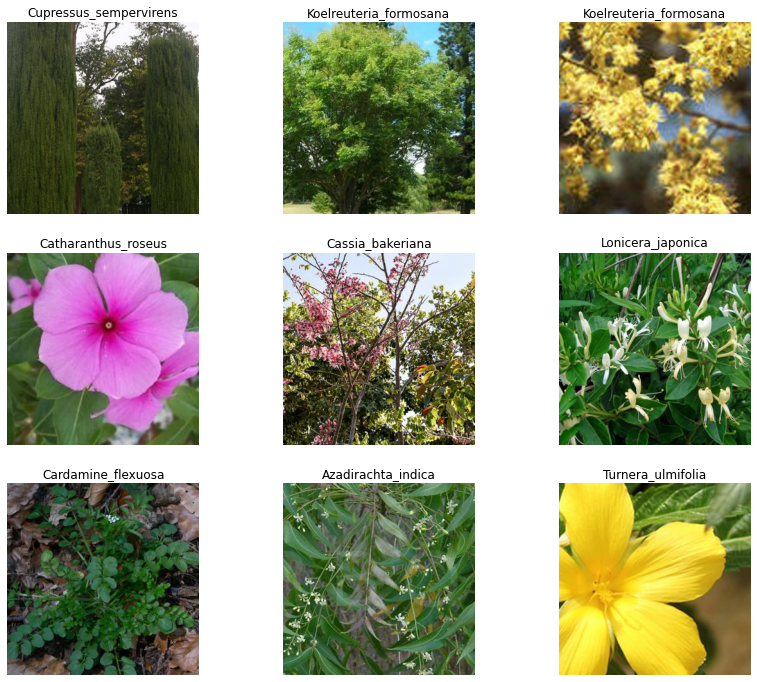

In [ ]:
#dls.show_batch(max_n=9, figsize=(7,6))
data.show_batch(max_n=9, figsize=(14,12))

In [6]:
print(data.vocab)
len(data.vocab),data.c

['Acacia_confusa', 'Acalypha_hispida', 'Alocasia_macrorrhiza', 'Aloe_vera', 'Alpinia_purpurata', 'Anthurium_andreanum', 'Azadirachta_indica', 'Bauhinia_variegata', 'Bixa_orellana', 'Blighia_sapida', 'Bombax_glabra', 'Bougainvillea_sp', 'Brugmansia_x_candida', 'Caesalpinia_pulcherrima', 'Calotropis_gigantea', 'Canna_indica', 'Cardamine_flexuosa', 'Cardiospermum_grandiflorum', 'Cascabela_thevetia', 'Cassia_bakeriana', 'Casuarina_equisetifolia', 'Catharanthus_roseus', 'Cattleya_sp', 'Cecropia_obtusifolia', 'Chlorophytum_comosum', 'Clerodendrum_quadriloculare', 'Clitoria_ternatea', 'Cocos_nucifera', 'Codiaeum_variegatum', 'Couroupita_guianensis', 'Crescentia_cujete', 'Crinum_asiaticum', 'Cupressus_sempervirens', 'Cyperus_papyrus', 'Delonix_regia', 'Dendrobium_sp', 'Dichorisandra_thyrsiflora', 'Eichhornia_crassipes', 'Elaeocarpus_grandis', 'Erythrina_crista-galli', 'Eucalyptus_deglupta', 'Eugenia_uniflora', 'Ficus_microcarpa', 'Filicium_decipiens', 'Gardenia_brighamii', 'Gomphrena_globosa',

(102, 102)

In [7]:
import torchvision.models as TorchModels

In [8]:

learn = cnn_learner(data, TorchModels.wide_resnet101_2 , metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet101_2-32ee1156.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(6

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,1.387430,0.812091,0.807696,2:00:53
1,0.565448,0.262558,0.930670,04:04
2,0.214529,0.089057,0.977204,04:05
3,0.123258,0.061500,0.984628,04:05


In [ ]:
learn.save('wideresnet-1')

Path('/content/drive/MyDrive/cs231n/project/UHManoa100/models/wideresnet-1.pth')

In [9]:
#loading the saved model
model_path = "/content/drive/MyDrive/cs231n/project/UHManoa100/models/wideresnet-1"

learn.load(model_path)

RuntimeError: ignored

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

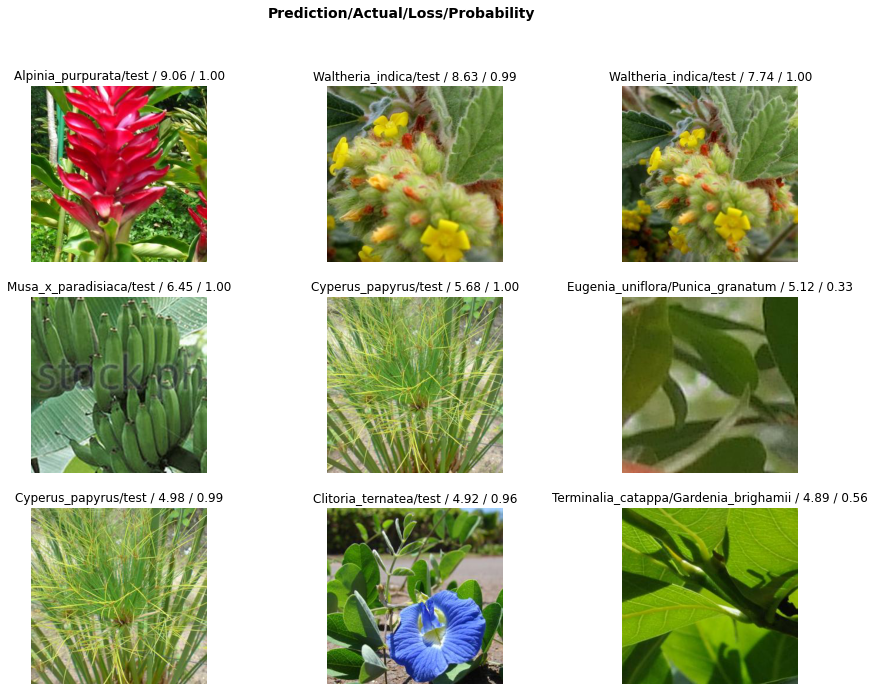

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

In [ ]:
doc(interp.plot_top_losses)

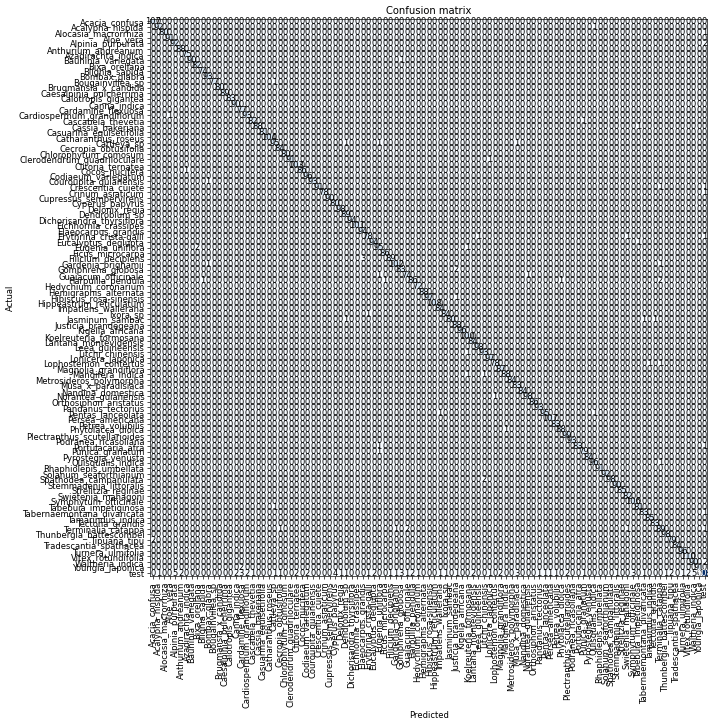

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:

interp.most_confused(min_val=2)

[('test', 'Alpinia_purpurata', 5),
 ('test', 'Waltheria_indica', 5),
 ('test', 'Cyperus_papyrus', 4),
 ('Filicium_decipiens', 'Elaeocarpus_grandis', 3),
 ('test', 'Cardamine_flexuosa', 3),
 ('test', 'Gomphrena_globosa', 3),
 ('test', 'Musa_x_paradisiaca', 3),
 ('test', 'Symphytum_officinale', 3),
 ('Alpinia_purpurata', 'test', 2),
 ('Eugenia_uniflora', 'Bixa_orellana', 2),
 ('Gomphrena_globosa', 'Justicia_brandegeana', 2),
 ('Harpullia_pendula', 'Terminalia_catappa', 2),
 ('Spathodea_campanulata', 'Litchi_chinensis', 2),
 ('Terminalia_catappa', 'Guaiacum_officinale', 2),
 ('Tipuana_tipu', 'Acacia_confusa', 2),
 ('Waltheria_indica', 'test', 2),
 ('Youngia_japonica', 'Cardamine_flexuosa', 2),
 ('test', 'Anthurium_andreanum', 2),
 ('test', 'Canna_indica', 2),
 ('test', 'Cardiospermum_grandiflorum', 2),
 ('test', 'Clitoria_ternatea', 2),
 ('test', 'Codiaeum_variegatum', 2),
 ('test', 'Eucalyptus_deglupta', 2),
 ('test', 'Harpullia_pendula', 2),
 ('test', 'Lantana_montevidensis', 2),
 ('tes

In [ ]:

learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.967788,0.622359,0.843668,05:22


In [ ]:
learn.load('wideresnet-1');

SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=1.5848931980144698e-06)

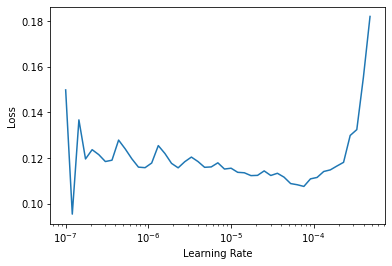

In [ ]:

learn.lr_find()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6,1e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.092990,0.052472,0.985988,05:20


epoch,train_loss,valid_loss,accuracy,time
0,0.092990,0.052472,0.985988,05:20
1,0.069572,0.046773,0.987974,05:18
